# Import Libraries

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

import matplotlib.pyplot as plt
import seaborn as sns


import warnings as wr
wr.filterwarnings('ignore')

# Data Loading

In [4]:
data = pd.read_csv('automobile.csv') 
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [5]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [6]:
data.shape

(202, 26)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          202 non-null    int64  
 1   normalized-losses  165 non-null    float64
 2   make               202 non-null    object 
 3   fuel-type          202 non-null    object 
 4   aspiration         202 non-null    object 
 5   num-of-doors       200 non-null    object 
 6   body-style         202 non-null    object 
 7   drive-wheels       202 non-null    object 
 8   engine-location    202 non-null    object 
 9   wheel-base         202 non-null    float64
 10  length             202 non-null    float64
 11  width              202 non-null    float64
 12  height             202 non-null    float64
 13  curb-weight        202 non-null    int64  
 14  engine-type        202 non-null    object 
 15  num-of-cylinders   202 non-null    object 
 16  engine-size        202 non

In [8]:
data.isnull().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  0
stroke                0
compression-ratio     0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

# Pre-processing: Handling Wrong Enteries

In [13]:
# Checking for wrong enteries like symbols -, ?, #, * etc,

# Function to identify wrong entries
def is_wrong_entry(x):
    return isinstance(x, str) and x in ['-', '?', '#', '*']

# Creating a mask to identify wrong entries
mask = data.applymap(is_wrong_entry)
print("Mask of wrong entries:")
print(mask)

Mask of wrong entries:
     symboling  normalized-losses   make  fuel-type  aspiration  num-of-doors  \
0        False              False  False      False       False         False   
1        False              False  False      False       False         False   
2        False              False  False      False       False         False   
3        False              False  False      False       False         False   
4        False              False  False      False       False         False   
..         ...                ...    ...        ...         ...           ...   
197      False              False  False      False       False         False   
198      False              False  False      False       False         False   
199      False              False  False      False       False         False   
200      False              False  False      False       False         False   
201      False              False  False      False       False         False   

    

In [16]:
# Getting the positions of wrong entries
wrong_entries_positions = np.where(mask)
rows, cols = wrong_entries_positions

# Displaying the positions and corresponding wrong entries
for row, col in zip(rows, cols):
    print(f"Wrong entry '{data.iat[row, col]}' found at Row: {row}, Column: {data.columns[col]}")

Wrong entry '?' found at Row: 52, Column: bore
Wrong entry '?' found at Row: 52, Column: stroke
Wrong entry '?' found at Row: 53, Column: bore
Wrong entry '?' found at Row: 53, Column: stroke
Wrong entry '?' found at Row: 54, Column: bore
Wrong entry '?' found at Row: 54, Column: stroke
Wrong entry '?' found at Row: 55, Column: bore
Wrong entry '?' found at Row: 55, Column: stroke
Wrong entry '?' found at Row: 126, Column: horsepower
Wrong entry '?' found at Row: 126, Column: peak-rpm
Wrong entry '?' found at Row: 127, Column: horsepower
Wrong entry '?' found at Row: 127, Column: peak-rpm


In [17]:
data = data.replace('?',np.NAN)

# Pre-processing: Handling Dtype Problems

In [20]:
print(data.dtypes)

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object


Convert numerical data into 'float':

In [25]:
convert_col = ['bore',  'stroke', 'horsepower', 'peak-rpm']
for col in convert_col:
    data[col]=pd.to_numeric(data[col]) #convert float
    
#pd.to_numeric(data[col]).astype(int/float)

In [22]:
print(data.dtypes)

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object


# Pre-processing: Handling Missing values

In [26]:
#finding missing values
data.isnull().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

<Axes: >

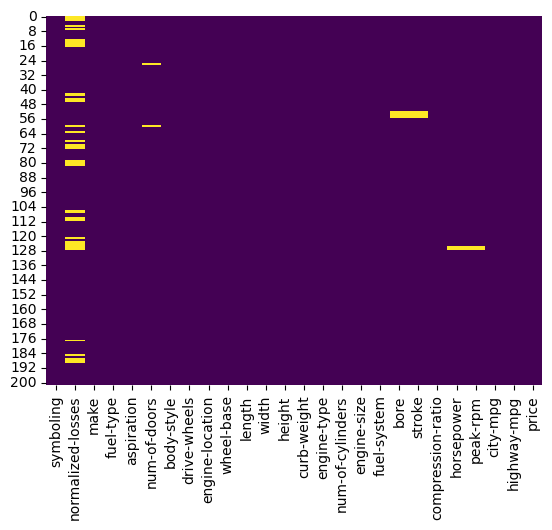

In [27]:
#visualizing null values
sns.heatmap(data.isnull(), cbar = False, linecolor = 'yellow', cmap = 'viridis') #[cmap = plasma, inferno, magma]

Basic statistics for missing value features

In [28]:
missing_num_col = ['normalized-losses','bore','stroke','horsepower','peak-rpm']

df_col_name = ['Feature','Min','5th percentile','Q1','Median','Mean','Mode','Q3','95th percentile','Maximum']

def quick_stat (df2):
    df2 = pd.DataFrame([[i, df2[i].min(), df2[i].quantile(.05), df2[i].quantile(.25), df2[i].median(), df2[i].mean(),
                         df2[i].mode()[0], df2[i].quantile(.75), df2[i].quantile(.95), df2[i].max()] for i in missing_num_col],
                       columns= df_col_name)
    return df2

quick_stat(data)

,Feature,Min,5th percentile,Q1,Median,Mean,Mode,Q3,95th percentile,Maximum
0,normalized-losses,65.00,74.0000,94.00,115.00,121.836364,161.00,150.00,188.00,256.00
1,bore,2.54,2.9625,3.15,3.31,3.332980,3.62,3.59,3.78,3.94
2,stroke,2.07,2.6400,3.11,3.29,3.256364,3.40,3.41,3.64,4.17
3,horsepower,48.00,62.0000,70.00,95.00,103.450000,68.00,116.00,176.30,262.00
4,peak-rpm,4150.00,4247.5000,4800.00,5200.00,5119.000000,4800.00,5500.00,6000.00,6600.00


In [29]:
missing_cat_col = ['num-of-doors']
data['num-of-doors'].mode()

0    four
Name: num-of-doors, dtype: object

Histogram for missing value features

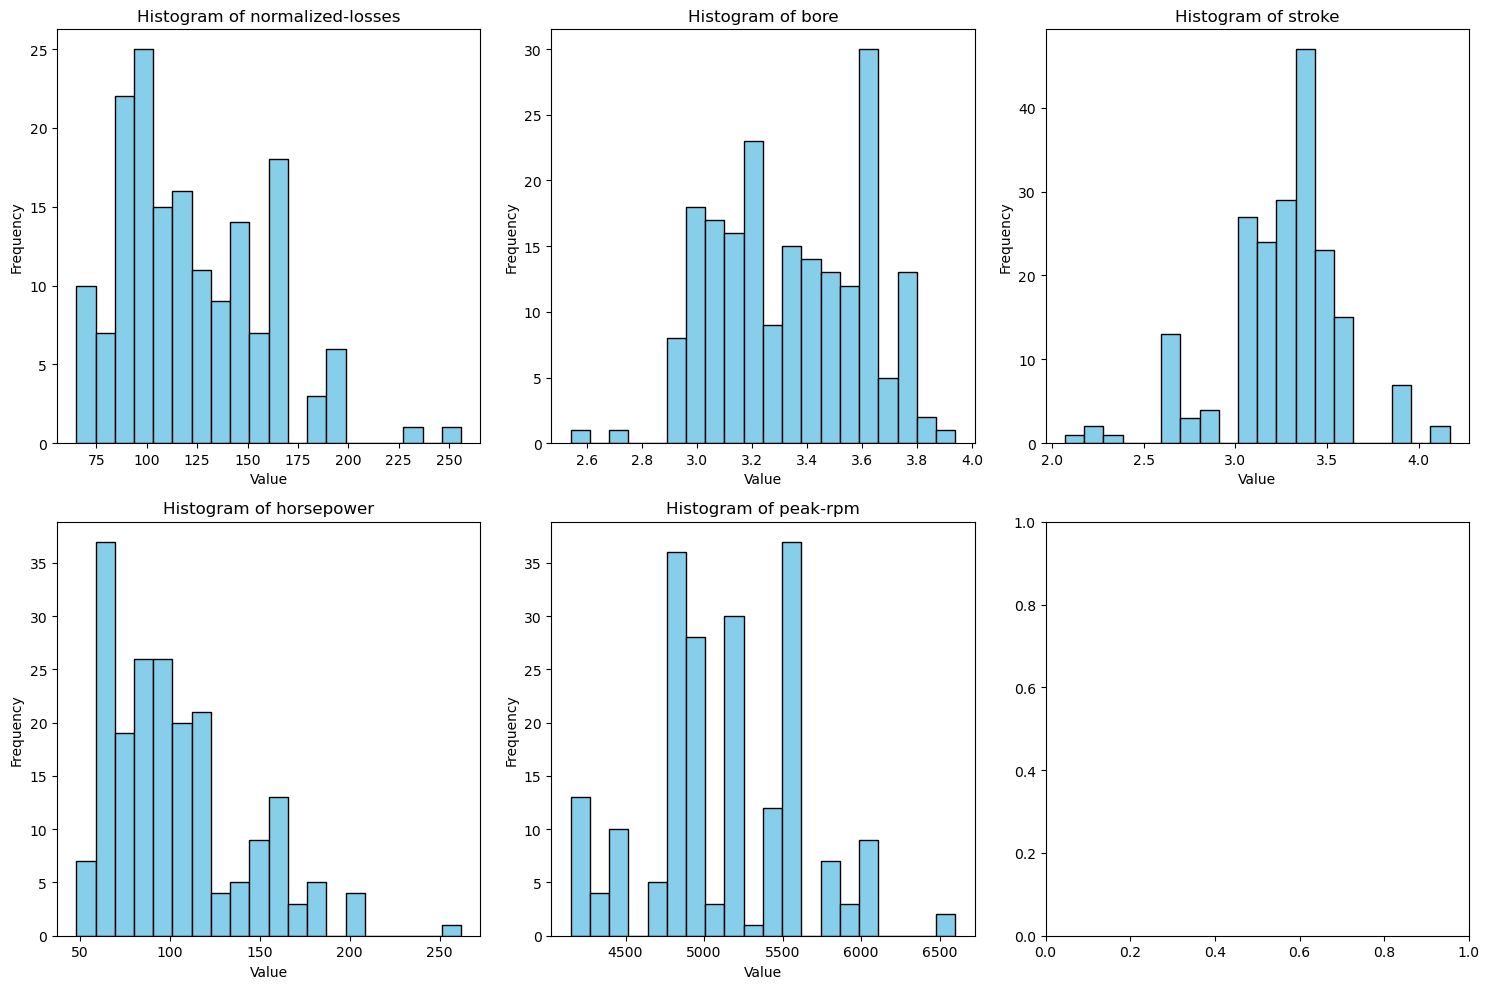

In [31]:
missing_num_col = ['normalized-losses', 'bore',  'stroke', 'horsepower', 'peak-rpm']

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

for i, col in enumerate(missing_num_col):
    axs[i].hist(data[col], bins=20, color='skyblue', edgecolor='black')
    axs[i].set_title(f'Histogram of {col}')
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')
    
plt.tight_layout()
plt.show()

In [32]:
df = data.copy()

In [33]:
#filling numerical features
missing_num_col = ['normalized-losses', 'bore',  'stroke', 'horsepower', 'peak-rpm']
for col in missing_num_col:
    df[col].fillna(df[col].median(), inplace=True)

#missing value of Categorical feature 'num-of-doors' is replaced with mode.
missing_cat_col = ['num-of-doors']
df['num-of-doors'] = df['num-of-doors'].replace(np.nan,'four')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [34]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Conclusion: Now there is no missing value in the dataset.

# Pre-processing: Convert word to number

In [35]:
df['num-of-doors'].unique()

array(['two', 'four'], dtype=object)

In [36]:
df['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [39]:
pip install word2number

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5590 sha256=f9762ab9d6628c8fe8e3fb0d071e901e672ef4045b061b11b984f63d500a05af
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\cd\ef\ae\073b491b14d25e2efafcffca9e16b2ee6d114ec5c643ba4f06
Successfully built word2number
Note: you may need to restart the kernel to use updated packages.


In [40]:
from word2number import w2n

df['num-of-doors'] = df['num-of-doors'].apply(w2n.word_to_num)
df['num-of-cylinders'] = df['num-of-cylinders'].apply(w2n.word_to_num)

In [41]:
df['num-of-doors'].unique()

array([2, 4], dtype=int64)

In [42]:
df['num-of-cylinders'].unique()

array([ 4,  6,  5,  3, 12,  2,  8], dtype=int64)

# Pre-processing: Encoding (Binary Encoder)

In [45]:
pip install category_encoders

  Obtaining dependency information for category_encoders from https://files.pythonhosted.org/packages/7f/e5/79a62e5c9c9ddbfa9ff5222240d408c1eeea4e38741a0dc8343edc7ef1ec/category_encoders-2.6.3-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/81.9 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/81.9 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/81.9 kB ? eta -:--:--
   -------------------- ------------------- 41.0/81.9 kB 393.8 kB/s eta 0:00:01
   ----------------------------------- ---- 71.7/81.9 kB 660.6 kB/s eta 0:00:01
   ---------------------------------------- 81.9/81.9 kB 459.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [46]:
from category_encoders import BinaryEncoder

In [48]:
binary = BinaryEncoder(cols=['make','fuel-type','aspiration','body-style',
                'drive-wheels','engine-location','engine-type','fuel-system'])
df_binary = df.copy() 

df_binary = binary.fit_transform(df_binary)
df_binary.head()

,symboling,normalized-losses,make_0,make_1,make_2,make_3,make_4,fuel-type_0,fuel-type_1,aspiration_0,...,fuel-system_2,fuel-system_3,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,0,0,0,0,1,0,1,0,...,0,1,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,115.0,0,0,0,0,1,0,1,0,...,0,1,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,115.0,0,0,0,0,1,0,1,0,...,0,1,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,0,0,0,1,0,0,1,0,...,0,1,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,0,0,0,1,0,0,1,0,...,0,1,3.19,3.40,8.0,115.0,5500.0,18,22,17450


# Pre-processing: Encoding (Label Encoder)

In [44]:
#from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_label = df.copy()
cat_features = ['make','fuel-type','aspiration','body-style',
                'drive-wheels','engine-location','engine-type','fuel-system']

for i in cat_features:
    df_label[i] = le.fit_transform(df_label[[i]])
    
df_label.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,0,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,115.0,0,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,115.0,0,1,0,2,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,1,1,0,4,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,1,1,0,4,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450


# Implementing Linear Resression Model

We will perform four LR Model as:
1. Binary Encoding, no scaling
2. Binary Encoding, standard scaling
3. Label Encoding, no scaling
4. Label Encoding, Standard scaling

# Model: 1 (Binary Encoding, no scaling)

In [69]:
X = df_binary.drop('price', axis = 1) #X = df_binary.loc[:,'symboling':'highway-mpg']
y = df_binary['price']

#splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state = 51)

In [70]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

Model_1 Evaluation

In [71]:
train1 = reg.score(X_train, y_train)
test1 = reg.score(X_test, y_test)
r2_score1 = r2_score(y_test, reg.predict(X_test))
mse1 = mean_squared_error(y_test, reg.predict(X_test))
rmse1 = math.sqrt(mse1)
mae1 = mean_absolute_error(y_test, reg.predict(X_test))

print('Train accuracy: ',train1)
print('Test accuracy: ',test1)
print('r2_score: ',r2_score1)
print('MSE: ',mse1)
print('RMSE: ',rmse1)
print('MAE: ',mae1)

Train accuracy:  0.9209707823447753
Test accuracy:  0.9454110914026537
r2_score:  0.9454110914026537
MSE:  3804510.726607052
RMSE:  1950.515502785623
MAE:  1548.7572535584773


Visualization: Actual Vs Predicted Price

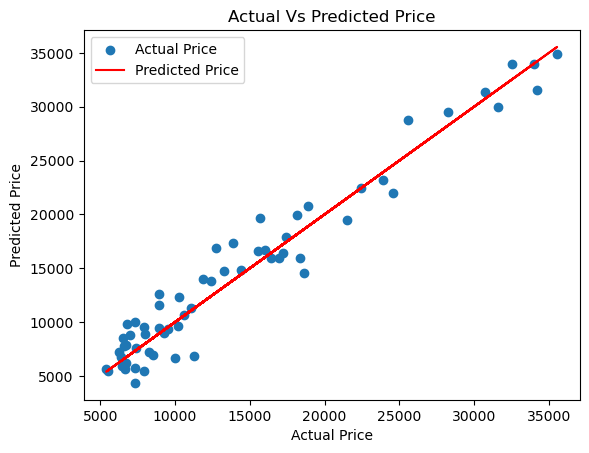

In [73]:
plt.scatter(x=y_test,y=reg.predict(X_test),label = 'Actual Price')
plt.plot(y_test,y_test,color = 'red',label = 'Predicted Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Vs Predicted Price')
plt.legend()
plt.show()

# Model: 2 (Binary Encoding, standard scaling)

In [74]:
scaler = StandardScaler()
std_X_train = scaler.fit_transform(X_train)
std_X_test = scaler.transform(X_test)

In [75]:
std_X_train

array([[ 0.81219941, -0.83525784,  1.09687055, ...,  0.31213602,
         0.22655565,  0.41551942],
       [-0.77835776,  1.21108055, -0.91168461, ..., -2.06684664,
         0.37513401,  0.27400194],
       [ 0.01692082, -0.1938682 , -0.91168461, ..., -0.22854185,
        -0.96207121, -0.99965543],
       ...,
       [-0.77835776, -0.1938682 , -0.91168461, ...,  0.63654275,
        -1.55638464, -1.56572537],
       [-1.57363635, -0.80471548,  1.09687055, ...,  0.4202716 ,
        -0.96207121, -0.85813794],
       [-0.77835776, -0.1938682 , -0.91168461, ..., -0.66108416,
         0.07797729,  0.13248445]])

In [76]:
reg2 = LinearRegression().fit(std_X_train, y_train)
reg2

LinearRegression()

Model_2 Evaluation

In [77]:
train2 = reg2.score(std_X_train, y_train)
test2 = reg2.score(std_X_test, y_test)
r2_score2 = r2_score(y_test, reg2.predict(std_X_test))
mse2 = mean_squared_error(y_test, reg2.predict(std_X_test))
rmse2 = math.sqrt(mse2)
mae2 = mean_absolute_error(y_test, reg2.predict(std_X_test))


print('Train accuracy : ',reg2.score(std_X_train, y_train))
print('Test accuracy : ',reg2.score(std_X_test, y_test))
print('MSE: ',mean_squared_error(y_test, reg2.predict(std_X_test)))
print('RMSE: ',math.sqrt(mean_squared_error(y_test, reg2.predict(std_X_test))))
print('MAE: ',mean_absolute_error(y_test, reg2.predict(std_X_test)))
print('r2_score: ',r2_score(y_test, reg2.predict(std_X_test)))

Train accuracy :  0.9209707823447751
Test accuracy :  0.9454110914026546
MSE:  3804510.726606986
RMSE:  1950.5155027856063
MAE:  1548.757253558499
r2_score:  0.9454110914026546


Visualization: Actual Vs Predicted Price

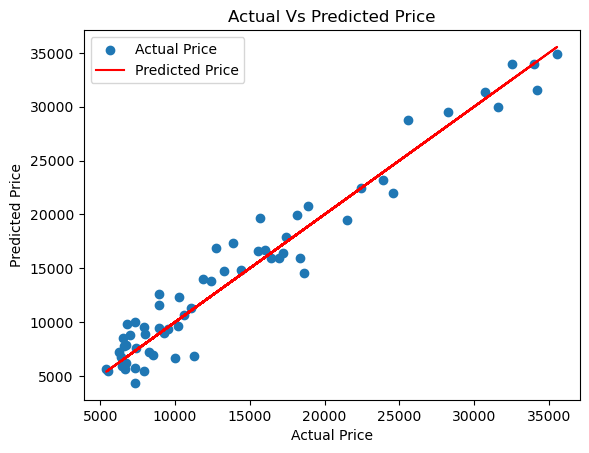

In [79]:
plt.scatter(x=y_test, y=reg2.predict(std_X_test), label = 'Actual Price')
plt.plot(y_test,y_test,color = 'red',label = 'Predicted Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Vs Predicted Price')
plt.legend()
plt.show()

# Model: 3 (Label Encoding, no scaling)

In [113]:
#selection of feature and target variables
X1 = df_label.loc[:,'symboling':'highway-mpg']
y1 = df_label['price']

#splitting dataset
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3,random_state = 40)

In [114]:
reg3 = LinearRegression().fit(X1_train, y1_train)
reg3

LinearRegression()

Model_3 Evaluation

In [115]:
train3 = reg3.score(X1_train, y1_train)
test3 = reg3.score(X1_test, y1_test)
r2_score3 = r2_score(y1_test, reg3.predict(X1_test))
mse3 = mean_squared_error(y1_test, reg3.predict(X1_test))
rmse3 = math.sqrt(mse3)
mae3 = mean_absolute_error(y1_test, reg3.predict(X1_test))


print('Train accuracy : ',reg3.score(X1_train, y1_train))
print('Test accuracy : ',reg3.score(X1_test, y1_test))
print('r2_score: ',r2_score(y1_test, reg3.predict(X1_test)))
print('MSE : ',mean_squared_error(y1_test, reg3.predict(X1_test)))
print('RMSE : ',math.sqrt(mean_squared_error(y1_test, reg3.predict(X1_test))))
print('MAE : ',mean_absolute_error(y1_test, reg3.predict(X1_test)))

Train accuracy :  0.8862789734904998
Test accuracy :  0.876720878455056
r2_score:  0.876720878455056
MSE :  6597044.950420558
RMSE :  2568.4713255982747
MAE :  1821.1933884638968


Visualization: Actual Vs Predicted Price

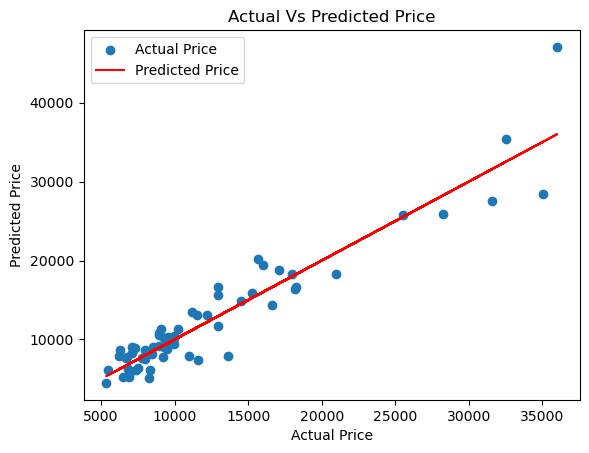

In [116]:
plt.scatter(x=y1_test, y=reg3.predict(X1_test), label = 'Actual Price')
plt.plot(y1_test,y1_test,color = 'red',label = 'Predicted Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Vs Predicted Price')
plt.legend()
plt.show()

# Model: 4 (Label Encoding, Standard scaling)

In [117]:
scaler = StandardScaler()
std_X1_train = scaler.fit_transform(X1_train)
std_X1_test = scaler.transform(X1_test)

In [118]:
std_X1_train

array([[ 0.94137899,  1.18943283, -0.17106466, ...,  0.86732874,
         0.87408347,  1.0314201 ],
       [-0.67733366, -1.01244939,  0.92530427, ..., -0.72532887,
         0.4312843 ,  0.19159199],
       [-1.48668999, -1.74641013,  1.08192841, ..., -1.40789641,
         0.72648374,  0.33156334],
       ...,
       [ 0.94137899,  0.363727  ,  1.08192841, ..., -0.72532887,
        -0.1591146 , -0.08835071],
       [ 0.13202266, -0.21732525, -1.73730598, ...,  0.86732874,
        -0.89711321, -0.78820747],
       [-0.67733366, -0.21732525, -0.48431292, ..., -1.40789641,
        -1.63511183, -2.04794963]])

In [119]:
reg4 = LinearRegression().fit(std_X1_train, y1_train)
reg4

LinearRegression()

Model_4 Evaluation

In [120]:
train4 = reg4.score(std_X1_train, y1_train)
test4 = reg4.score(std_X1_test, y1_test)
r2_score4 = r2_score(y1_test,reg4.predict(std_X1_test)) 
mse4 = mean_squared_error(y1_test,reg4.predict(std_X1_test))
rmse4 = math.sqrt(mean_squared_error(y1_test,reg4.predict(std_X1_test)))
mae4 =  mean_absolute_error(y1_test,reg4.predict(std_X1_test))

print('Train accuracy : ', reg4.score(std_X1_train, y1_train))
print('Test accuracy : ', reg4.score(std_X1_test, y1_test))
print('r2_score : ', r2_score(y1_test,reg4.predict(std_X1_test)))  
print('MSE : ', mean_squared_error(y1_test,reg4.predict(std_X1_test)))
print('RMSE : ', math.sqrt(mean_squared_error(y1_test,reg4.predict(std_X1_test))))
print('MAE : ', mean_absolute_error(y1_test,reg4.predict(std_X1_test)))

Train accuracy :  0.8862789734905
Test accuracy :  0.8767208784550159
r2_score :  0.8767208784550159
MSE :  6597044.950422704
RMSE :  2568.4713255986926
MAE :  1821.1933884640769


Visualization: Actual Vs Predicted Price

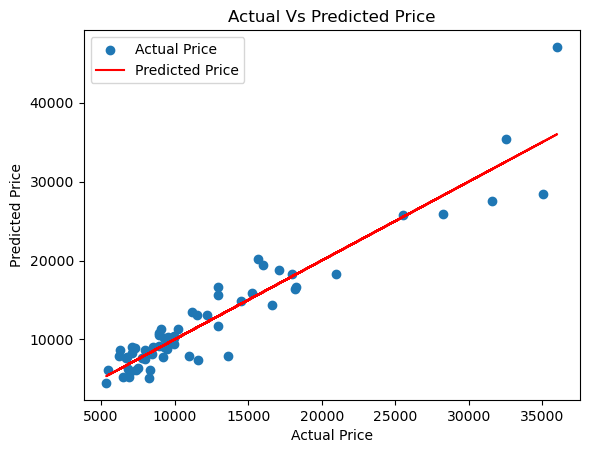

In [121]:
plt.scatter(x=y1_test, y=reg4.predict(std_X1_test), label = 'Actual Price')
plt.plot(y1_test,y1_test,color = 'red',label = 'Predicted Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Vs Predicted Price')
plt.legend()
plt.show()

In [122]:
d = {
    'model' : ['Model_1','Model_2', 'Model_3','Model_4'],
    'encoding': ['Binary','Binary','Label','Label'], 
    'scaling': ['None', 'Standard', 'None', 'Standard'], 
    'train accuracy': [train1,train2,train3,train4],
    'test accuracy': [test1,test2,test3,test4],
    'r2_score': [r2_score1,r2_score2,r2_score3,r2_score4],
    'mse': [mse1,mse2,mse3,mse4],
    'rmse': [rmse1,rmse2,rmse3,rmse4],
    'mae': [mae1,mae2,mae3,mae4],   
}


d = pd.DataFrame(d)
d['mse'] = np.floor(d['mse'])
d['rmse'] = np.floor(d['rmse'])
d['mae'] = np.floor(d['mae'])
d['train accuracy'] = d['train accuracy'].round(4)
d['test accuracy'] = d['test accuracy'].round(4)
d['r2_score'] = d['r2_score'].round(4)

d

,model,encoding,scaling,train accuracy,test accuracy,r2_score,mse,rmse,mae
0,Model_1,Binary,None,0.9210,0.9454,0.9454,3804510.0,1950.0,1548.0
1,Model_2,Binary,Standard,0.9210,0.9454,0.9454,3804510.0,1950.0,1548.0
2,Model_3,Label,None,0.8863,0.8767,0.8767,6597044.0,2568.0,1821.0
3,Model_4,Label,Standard,0.8863,0.8767,0.8767,6597044.0,2568.0,1821.0


# Conclusion:

Compairing four linear regression model, we see linear regression with Binary Encoding and without feature scaling,
again linear regression with Binary Encoding and with standard scaling gives the best result with lowest MSE, RMSE, MAE and highest 94.54% test accuracy, r2_score.